

 PCA :

[[ 0.52106591  0.37741762]
 [-0.26934744  0.92329566]
 [ 0.5804131   0.02449161]
 [ 0.56485654  0.06694199]]


 Unrotated FA :

[[ 0.88096009 -0.4472869 ]
 [-0.41691605 -0.55390036]
 [ 0.99918858  0.01915283]
 [ 0.96228895  0.05840206]]


 Varimax FA :

[[ 0.98633022 -0.05752333]
 [-0.16052385 -0.67443065]
 [ 0.90809432  0.41726413]
 [ 0.85857475  0.43847489]]


/var/folders/lv/6w_73hxs6p1196jfq_vh_8_c0000gn/T/ipykernel_3444/3055185931.py:60: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/var/folders/lv/6w_73hxs6p1196jfq_vh_8_c0000gn/T/ipykernel_3444/3055185931.py:60: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/var/folders/lv/6w_73hxs6p1196jfq_vh_8_c0000gn/T/ipykernel_3444/3055185931.py:60: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


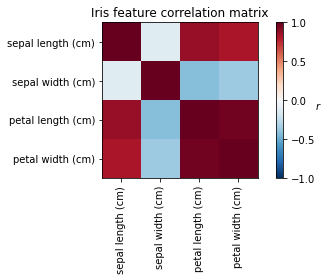

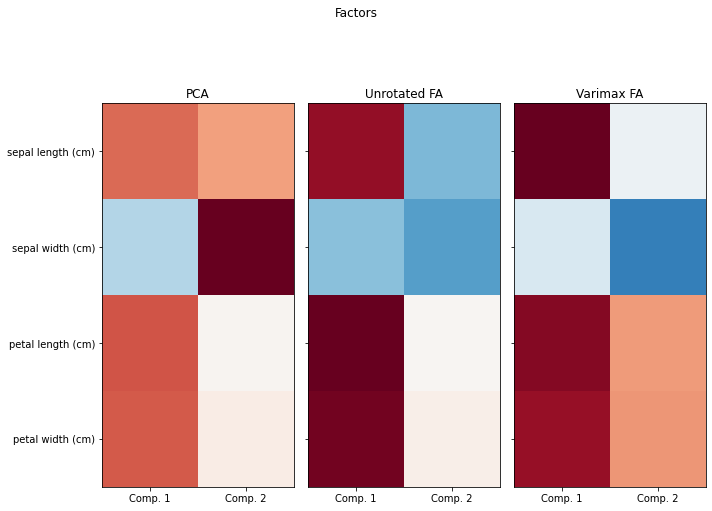

In [1]:
#########################################################################################################################################
#                                                                                                                                       #
#    Autor: Dr. A. Schelle (support@krealix.de). Copyright : IU Internationale Hochschule GmbH, Juri-Gagarin-Ring 152, D-99084 Erfurt   #
#                                                                                                                                       #
#########################################################################################################################################

##########################################################################
#                                                                        # 
#   PYTHON ROUTINE zur Analyse eines Datensates mit der Faktor Analyse   #
#                                                                        # 
##########################################################################

# Authors: Jona Sassenhagen
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

data = load_iris()
X = StandardScaler().fit_transform(data["data"])
feature_names = data["feature_names"]

ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")
plt.tight_layout()

n_comps = 2

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(feature_names)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()
